Questions for Week1

Do not change anything in the code ..... just write the functions with the content your are given.

Request: Refrain from using any external source for coding for this week, like chatgpt:( .... all you need in this, is there in the tutorials that were provided. You may see those.

Happy coding :)




While using numpy, we mostly deal with matrix operations. So, let's building our own inverse function

This function:\
1 Takes a np.array of size nXn ... it is your job to check if the matrix is a square matrix or not :)\
2 Returns the inverse of the matrix if possible, otherwise, returns a matrix of 0s

In [1]:
import numpy as np

def inverse(matrix):
    '''
    implement your function here
    you are not allowed to use the inbuilt inverse function in numpy
    feel free to use your favourite algorithm to calculate the inverse :)
    '''
    array = np.array(matrix)
    if np.linalg.det(array) == 0 or array.shape[0] != array.shape[1]:
        inv = np.zeroes(array.shape)
        return inv
    else:
        inv = np.eye(array.shape[0])
        for i in range(array.shape[1]):
            for j in range(i+1, array.shape[0]):
                array[j] = array[j] - array[i] * array[j][i] / array[i][i]
                inv[j] = inv[j] - inv[i] * array[j][i] / array[i][i]
        for i in range(array.shape[1]-1, -1, -1):
            for j in range(i-1, -1, -1):
                array[j] = array[j] - array[i] * array[j][i] / array[i][i]
                inv[j] = inv[j] - inv[i] * array[j][i] / array[i][i]
        for i in range(array.shape[0]):
            inv[i] = inv[i] / array[i][i]
        return inv
                    

We won't believe your code this easily man. Hehe :)

Now you will write a code to test out if your inverse is indeed correct

The test function will take an np.array

The test function will return:\
1 True, if the inverse is correct\
2 False if the inverse is incorrect

Isn't it amazing :)

In [2]:
def test(matrix):
    '''
    you will have to use np.linalg.inv to get the inverse and check the value got from your inverse function
    ofc you will have to see if the matrix is invertible or not :)
    before that, if it is a square matrix or not :)
    '''
    if matrix.shape[0] != matrix.shape[1] or np.linalg.det(matrix) == 0:
        return False
    elif np.array_equal(inverse(matrix), np.linalg.inv(matrix)):
        return True
    return False
    

Okay, I think we should also do something.\
Here is the code to test out your implementations of the upper two functions.

In [3]:
flag = True
for i in range(908):
    n = np.random.randint(2,6)
    m = n + (np.random.randint(0,2) % 2 != 0)
    matrix = np.random.randint(0, 20, size=(n,m)) + np.random.rand(n,m)
    if (not test(matrix)):
        flag = False
        print("You passed", i, "testcases:(")
        break
if (flag):
    print("Congrats!!! You passed all testcases")

You passed 0 testcases:(


Pheww finally numpy done.

Let's move on to pandas and matplotlib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Load the file data.csv into a pandas dataframe.

There are a lot of fields in the data. You have to plot, in a different bar graphs:\
1 number of cases with tumor size > 3 vs age\
2 (average breast_quad_left_low and average breast_quad_right_low) vs age for cases of irradiat\
3 (average breast_quad_left_low and average breast_quad_right_low) vs age for cases of non-irradiat\
4 (average breast_quad_left_high and average breast_quad_right_high) vs age for cases of irradiat\
5 (average breast_quad_left_high and average breast_quad_right_high) vs age for cases of non-irradiat

print the total number of cases of irradiat

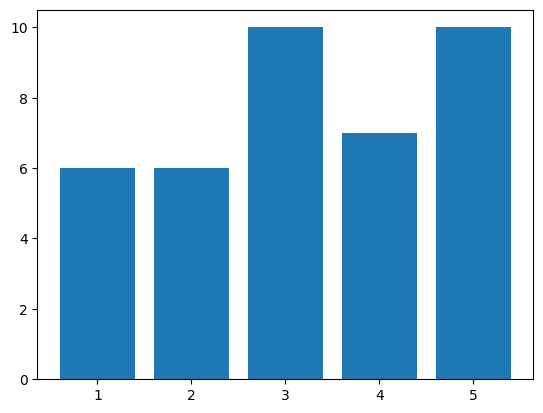

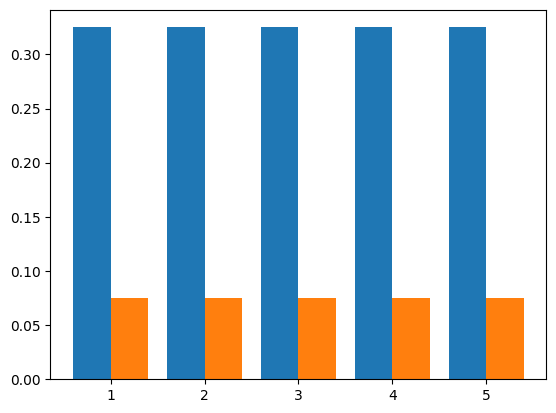

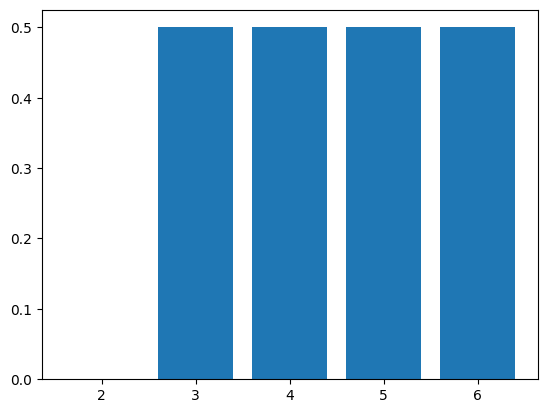

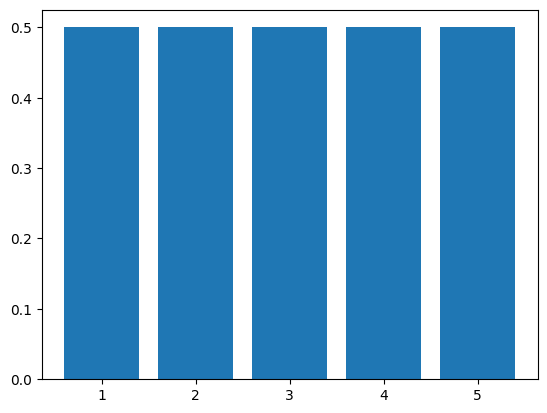

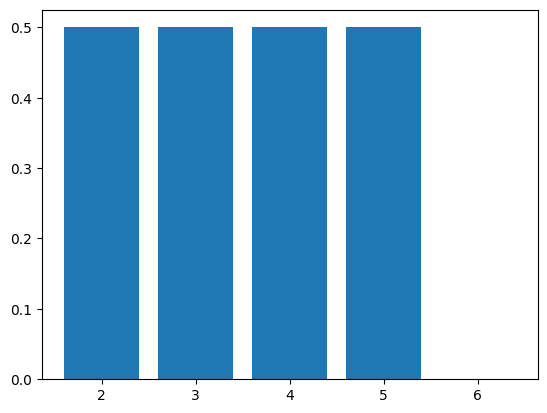

16


In [11]:
'''
So get set go!!!
The final graphs are given .... code up and compare
'''
df = pd.read_csv('data.csv')
df1 = df[df['tumor_size'] > 3]
df2 = df[df['irradiat'] == 0]
df3 = df[df['irradiat'] == 1]
plt.bar(df1['age'], df1['tumor_size'])
plt.show()
barwidth = 0.4
plt.bar(df2['age'] - 0.2, df2['breast_quad_left_low']/(len(df2)-1), width = barwidth) 
plt.bar(df2['age'] + 0.2, df2[df2['age'] = ].sum()/(len(df2)-1), width = barwidth)
plt.show()
plt.bar(df3['age'], (df3['breast_quad_left_low'] + df3['breast_quad_right_low'])/2)
plt.show()
plt.bar(df2['age'], (df2['breast_quad_left_up'] + df2['breast_quad_right_up'])/2)
plt.show()
plt.bar(df3['age'], (df3['breast_quad_left_up'] + df3['breast_quad_right_up'])/2)
plt.show()
print(len(df3)-1)
